<font size="6">BERT</font><br>
<font size="3">Prof. Dr. Renato Moraes Silva</font>

## Baixando a base de dados e Visualizando os Dados

In [ ]:
# Importando bibliotecas para computação científica e análise de dados
import numpy as np  # Biblioteca para arrays e operações numéricas
import pandas as pd  # Biblioteca para manipulação de dados tabulares

# Importando biblioteca para aprendizado de máquina
import sklearn as skl  # Biblioteca para aprendizado de máquina

# Importando bibliotecas para manipulação de strings e expressões regulares
import re  # Biblioteca para operações com expressões regulares

# Importando bibliotecas para interagir com o sistema operacional
import os  # Biblioteca para operações do sistema operacional, como manipulação de arquivos e diretórios
import subprocess  # Biblioteca para criação de novos processos e execução de comandos do sistema

# Importando biblioteca para manipulação de arquivos ZIP
from zipfile import ZipFile  # Classe para manipulação de arquivos ZIP

# Instalando e importando biblioteca para processamento de linguagem natural (NLP)
!pip install nltk
import nltk  # Biblioteca para processamento de linguagem natural

# Importando um stemmer específico para o português
from nltk.stem import RSLPStemmer  # Stemmer para a língua portuguesa

# Importando biblioteca para manipulação de caracteres Unicode
import unicodedata  # Biblioteca para manipulação de dados Unicode

# Instalando e importando biblioteca para modelagem de tópicos e processamento de texto
!pip install gensim
import gensim  # Biblioteca para modelagem de tópicos e processamento de texto

# Importando modelos de embeddings de palavras do gensim
from gensim.models import Word2Vec, KeyedVectors  # Modelos de embeddings de palavras

# Reimportando sklearn para acesso a módulos específicos
import sklearn as skl  # Biblioteca para aprendizado de máquina

# Importando módulos específicos do scikit-learn
from sklearn import linear_model, feature_extraction  # Modelos lineares e extração de características

# Importando classes para validação cruzada e otimização de hiperparâmetros
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV  # Validação cruzada estratificada e busca aleatória de hiperparâmetros

# Importando classe para codificação de rótulos categóricos
from sklearn.preprocessing import LabelEncoder  # Codificação de rótulos categóricos

# Importando métricas para avaliação de modelos de aprendizado de máquina
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report  # Métricas de avaliação de performance de modelos

# Importando algoritmo de regressão logística
from sklearn.linear_model import LogisticRegression  # Algoritmo de classificação linear (Regressão Logística)

# Importanto para download através do google
from google.colab import files

# Importa a biblioteca matplotlib.pyplot para visualização de gráficos
import matplotlib.pyplot as plt

# Importa a biblioteca seaborn para visualização estatística
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
import os
import subprocess

#define função para dowload
def download(url, path):

    # comando para fazer o download
    cmd = ['wget', '-q', url, '-O', '%s' %(path)]

    # executa o comando sem exibir a saída na tela
    processo = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # aguarda o término do download
    stdout, stderr = processo.communicate()

    # Verifica se o processo foi concluído com sucesso (código de retorno zero)
    if processo.returncode == 0:
        print(f'Processo finalizado.')
    else:
        print(f'Houve um erro: {stderr.decode("utf-8")}')

In [ ]:
#define função para descompactação
def unzip(path, pathFolder):

    try:
        # descompacta ao arquivo
        z = ZipFile(path, 'r')
        z.extractall(pathFolder)
        z.close()

        print("Arquivo descompactado com sucesso!")
    except:
        print("Houve um erro ao tentar descompactar o arquivo")

In [ ]:
url = 'https://www.dropbox.com/scl/fi/nvnwiv3qk4h2usyusizyw/arquivos_competicao.zip?rlkey=6cnsqmqfqn2w6c8xc296vvtg9&st=w0gst5mi&dl=0'

# especifica o local onde ficarao os arquivos
path_files = 'dados'
path_folder = '/content/dados'
path_dataset_name = '/arquivos_competicao.zip'
path_dataset = '/arquivos_competicao'

#Faz dowload da base de dados
download(url, path_dataset_name)

# descompacta a base de dados de notícias
unzip(path_dataset_name, path_files)

Processo finalizado.
Arquivo descompactado com sucesso!


In [ ]:
# Carregue o arquivo CSV de treino e teste
train_dataset = pd.read_csv(f'{path_folder+path_dataset}/train.csv')
test_dataset = pd.read_csv(f'{path_folder+path_dataset}/test.csv')

In [ ]:
train_dataset

,ID,Class
0,news_00002.xml,Mercados
1,news_00003.xml,Mercados
2,news_00006.xml,Mercados
3,news_00007.xml,Economia
4,news_00008.xml,Mercados
...,...,...
2776,news_03969.xml,Mercados
2777,news_03971.xml,Mercados
2778,news_03972.xml,Economia
2779,news_03973.xml,Mercados


In [ ]:
test_dataset

,ID
0,news_00001.xml
1,news_00004.xml
2,news_00005.xml
3,news_00011.xml
4,news_00015.xml
...,...
1188,news_03946.xml
1189,news_03948.xml
1190,news_03950.xml
1191,news_03965.xml


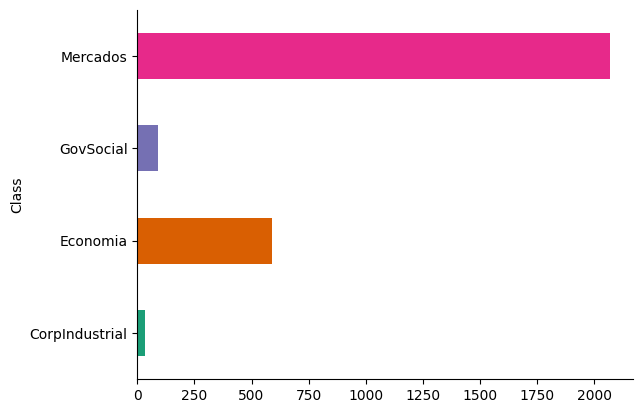

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train_dataset.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Pré-processamento da base de dados do tipo Text


In [ ]:
# Copiar a coluna "ID" do conjunto de dados de treinamento para uma variável separada.
train_df = train_dataset["ID"].copy()

# Copiar a coluna "Class" do conjunto de dados de treinamento para outra variável separada.
train_class_df = train_dataset["Class"].copy()

# Copiar a coluna "ID" do conjunto de dados de teste para uma variável separada.
test_df = test_dataset["ID"].copy()

# Obter as classes distintas presentes na coluna "Class" do conjunto de dados de treinamento.
distinctive_classes = np.unique(train_class_df)

# Imprimir as classes distintas presentes no conjunto de dados de treinamento.
print(f"Classes distintas:\n{distinctive_classes}")

Classes distintas:
['CorpIndustrial' 'Economia' 'GovSocial' 'Mercados']


In [ ]:
def preprocess_xml(filename):
    """
    Pré-processa um arquivo XML, lendo seu conteúdo e retornando como texto.

    Args:
        filename (str): O nome do arquivo XML a ser pré-processado.

    Returns:
        str: O conteúdo do arquivo XML como texto.
    """
    news_path = "/news"
    path = path_folder + path_dataset + news_path  # Caminho completo para o diretório de notícias
    file_text = open(path + '/' + filename, "r", encoding='utf8', errors='replace')  # Abre o arquivo XML para leitura
    text = file_text.read()  # Lê o conteúdo do arquivo XML como texto
    return text

# Pré-processamento dos arquivos XML de treinamento
for i, news_id in enumerate(train_df):
    train_df[i] = preprocess_xml(news_id)

# Pré-processamento dos arquivos XML de teste
for i, news_id in enumerate(test_df):
    test_df[i] = preprocess_xml(news_id)


In [ ]:
train_df

0       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
1       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
3       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
4       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
                              ...                        
2776    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2777    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2778    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2779    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2780    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
Name: ID, Length: 2781, dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('rslp')

def preprocessing_portuguese(text, stemming = False, stopwords = False):
  """
    Funcao usada para tratar textos escritos na lingua portuguesa

    Parametros:
        text: variavel do tipo string que contem o texto que devera ser tratado

        stemming: variavel do tipo boolean que indica se a estemizacao deve ser aplicada ou nao

        stopwords: variavel do tipo boolean que indica se as stopwords devem ser removidas ou nao
    """

  # Lower Case
  text = text.lower()

  # remove os acentos das palavras
  nfkd_form = unicodedata.normalize('NFKD', text)
  text = u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

  # remove tags HTML e XML
  regex = re.compile('<[^<>]+>')
  text = re.sub(regex, " ", text)

  # normaliza as URLs
  regex = re.compile('(http|https)://[^\s]*')
  text = re.sub(regex, "<URL>", text)

  # normaliza emails
  regex = re.compile('[^\s]+@[^\s]+')
  text = re.sub(regex, "<EMAIL>", text)

  # converte todos os caracteres não-alfanuméricos em espaço
  regex = re.compile('[^A-Za-z0-9]+')
  text = re.sub(regex, " ", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+.[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+,[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # substitui varios espaçamentos seguidos em um só
  text = ' '.join(text.split())

  # separa o texto em palavras
  words = text.split()

  # remove stopwords
  if stopwords:
    words = text.split() # separa o texto em palavras
    words = [w for w in words if not w in nltk.corpus.stopwords.words('portuguese')]
    text = " ".join( words )

  # aplica estemização
  if stemming:
    stemmer_method = RSLPStemmer()
    words = [ stemmer_method.stem(w) for w in words ]
    text = " ".join( words )

  # remove palavras compostas por apenas um caracter
  words = text.split() # separa o texto em palavras
  words = [ w for w in words if len(w)>1 ]
  text = " ".join( words )

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:
print('Antes do tratamento: ', train_df[3])

Antes do tratamento:  <?xml version="1.0" encoding="UTF-8"?>

<newsitem date="1996-10-29" id="root" itemid="50139" xml:lang="pt">
<title></title>
<headline> ÍNDICE PREÇOS PRODUÇÃO INDUSTRIAL AGO 1996 SOBE. </headline>
<byline></byline>
<dateline></dateline>
<text>
<p>     LISBOA, 29 Out (Reuter) - O Índice de Preços na Produção </p>
<p> Industrial subiu 0,3 pct para 120,6 em Agosto de 1996 </p>
<p> relativamente ao mês anterior, tendo aumentado 3,1 pct face a </p>
<p> Agosto de 1995, segundo dados hoje divulgados pelo Instituto </p>
<p> Nacional de Estatística (INE). </p>
<p>     A partir de Agosto de 1996, o INE passa a publicar o índice </p>
<p> geral deste indicador, o qual agrega &quot;cerca de 72 pct do valor </p>
<p> total das vendas de produtos, da indústria portuguesa, para o </p>
<p> mercado nacional&quot;, depois de passar a incluir os bens </p>
<p> intermédios e os bens de consumo não duradouro, segundo </p>
<p> informação do INE. </p>
<p>     .       AGO96     JUL96 AGO95  

In [ ]:
print('\nDepois do tratamento: ', preprocessing_portuguese(train_df[3], stemming = True, stopwords = True))


Depois do tratamento:  indic prec produca industr ago numer sob lisbo numer out reut indic prec produca industr sub numer pct numer agost numer relativ me anteri tend aument numer pct fac agost numer segund dad hoj divulg institut nacion estatis ine part agost numer ine pass public indic geral dest indic agreg quot cerc numer pct val total vend produt industr portugu merc nacion quot pass inclu bem intermedi bem consum nao duradour segund informaca ine agonumer julnumer agonumer indic geral numer numer numer variaca mens numer pct numer pct variaca homolog numer pct numer pct acumul ano numer pct numer pct acumul ult numer mes numer pct numer pct lisbo editor numer numer reut limited numer reut limited numer


In [ ]:
# Aplicar a função de pré-processamento aos conjuntos de dados de treino e teste com remoção de stopwords e estemizacao
train_df = train_df.apply(lambda x: preprocessing_portuguese(x, stemming=True, stopwords=True))
test_df = test_df.apply(lambda x: preprocessing_portuguese(x, stemming=True, stopwords=True))

In [ ]:
train_df

0       futur ot dez numer cai numer contr numer pt fu...
1       resum transacco merc continu lisbo numer set r...
2       indic psinumer sob numer pont numer numer lisb...
3       indic prec produca industr ago numer sob lisbo...
4       bdp interromp problem comunicaco lisbo numer s...
                              ...                        
2776    mmi transacc numer mc futur faz numer mc lisbo...
2777    escud abr pression alt contr marc escud abr su...
2778    result ult colocaco bt pdnw dat praz coloc tax...
2779    acco preve corrig esper nov iorqu acco continu...
2780    ugt qu assin ace falt numer aument salari nume...
Name: ID, Length: 2781, dtype: object

In [ ]:
test_df

0       prova inflaca retom tendenc descend ine lisbo ...
1       mmi transacc numer mc futur faz numer mc lisbo...
2       acco segu pouc volatel apat dev mant lisbo num...
3       escud seg estavel apa mei sessa escud segu rel...
4       mmi transacc numer mc tmp numer pct lisbo nume...
                              ...                        
1188    sistem fiscal penaliz empr nao financ aip lisb...
1189    sous franc admit polic fiscal mant sigil lisbo...
1190    ipi nov numer cai numer pct numer vs nov numer...
1191    bp nao cort tax dev inflaca camb lisbo numer n...
1192    ipc nao transaciona dev desc abaix numer bp li...
Name: ID, Length: 1193, dtype: object

## BERT

In [ ]:
!pip install accelerate>=0.21.0
!pip install -U transformers[torch] accelerate
!pip install -U datasets

In [ ]:
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [ ]:
label_encoder = LabelEncoder()
train_class_encoded = label_encoder.fit_transform(train_class_df)

In [ ]:
# Carregar o tokenizer e o modelo
modelName = 'adalbertojunior/distilbert-portuguese-cased'
tokenizer = AutoTokenizer.from_pretrained(modelName)
model = AutoModelForSequenceClassification.from_pretrained(modelName, num_labels=4)  # 4 classes

# Tokenizar os dados
def tokenize_function(dataset):
    inputs = tokenizer(dataset['text'], padding=True, truncation=True, max_length=128, return_tensors="pt")
    return {'input_ids': inputs['input_ids'].squeeze(), 'attention_mask': inputs['attention_mask'].squeeze(), 'label': torch.tensor(dataset['label'], dtype=torch.long)}

# Preparar os datasets no formato esperado pelo transformers
train_texts = train_df.tolist()
test_texts = test_df.tolist()
train_labels = train_class_encoded.tolist()

# Dividir os dados de treino em treino e validação
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=42)

train_dataset = Dataset.from_dict({'text': train_texts, 'label': train_labels})
val_dataset = Dataset.from_dict({'text': val_texts, 'label': val_labels})

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.remove_columns(["text"])
val_dataset = val_dataset.remove_columns(["text"])

train_dataset.set_format("torch")
val_dataset.set_format("torch")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at adalbertojunior/distilbert-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2224 [00:00<?, ? examples/s]

Map:   0%|          | 0/557 [00:00<?, ? examples/s]

In [ ]:
# Função para calcular métricas
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    accuracy = (preds == labels).mean()

    # Calcular o F1-score
    f1 = f1_score(labels, preds, average='weighted')

    # Calculando a curva ROC e AUC para cada classe
    n_classes = len(np.unique(labels))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(labels, p.predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calculando a média da AUC
    auc_scores = [roc_auc[i] for i in range(n_classes)]
    mean_auc_score = np.mean(auc_scores)

    return {
        "accuracy": accuracy,
        "f1_score": f1,
        "roc_auc_scores": auc_scores,
        "mean_auc_score": mean_auc_score
    }

# Definir os argumentos de treinamento
training_args = TrainingArguments(
    output_dir='./outputs',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch"
)

# Inicializar o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Treinar o modelo
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score,Roc Auc Scores,Mean Auc Score
1,0.000000,0.473261,0.965889,0.964204,"[0.978507704785077, 0.9920572477614178, 0.9366852886405959, 0.9909519168291097]",0.974551
2,0.000000,0.761077,0.937163,0.946969,"[0.9574209245742092, 0.9860252519575887, 0.9651769087523278, 0.9646036387264457]",0.968307
3,0.000100,0.377336,0.964093,0.962000,"[0.9697891321978913, 0.9929751601663481, 0.947486033519553, 0.9969460688758934]",0.976799


Trainer is attempting to log a value of "[0.978507704785077, 0.9920572477614178, 0.9366852886405959, 0.9909519168291097]" of type <class 'list'> for key "eval/roc_auc_scores" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.9574209245742092, 0.9860252519575887, 0.9651769087523278, 0.9646036387264457]" of type <class 'list'> for key "eval/roc_auc_scores" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.9697891321978913, 0.9929751601663481, 0.947486033519553, 0.9969460688758934]" of type <class 'list'> for key "eval/roc_auc_scores" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=834, training_loss=0.01398337217052539, metrics={'train_runtime': 95.929, 'train_samples_per_second': 69.551, 'train_steps_per_second': 8.694, 'total_flos': 220963501817856.0, 'train_loss': 0.01398337217052539, 'epoch': 3.0})

In [ ]:
def tokenize_function_without_labels(dataset):
    inputs = tokenizer(dataset['text'], padding=True, truncation=True, max_length=128, return_tensors="pt")
    return {'input_ids': inputs['input_ids'].squeeze(), 'attention_mask': inputs['attention_mask'].squeeze()}

In [ ]:
# Função para prever as probabilidades das classes
def predict_proba(model, dataloader):
    model.eval()
    all_logits = []

    for batch in dataloader:
        with torch.no_grad():
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            all_logits.append(logits.cpu().numpy())

    all_logits = np.concatenate(all_logits, axis=0)

    # Aplicar softmax para normalizar as probabilidades
    probabilities = F.softmax(torch.tensor(all_logits), dim=1).numpy()

    return probabilities

# Preparar o DataLoader para o dataset de teste
dataset_test = Dataset.from_dict({'text': test_texts})
dataset_test = dataset_test.map(tokenize_function_without_labels, batched=True)
dataset_test.set_format(type='torch', columns=['input_ids', 'attention_mask'])

test_dataloader = DataLoader(dataset_test, batch_size=8)

# Definir o dispositivo (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prever as probabilidades das classes nos dados de teste
test_probabilities = predict_proba(model, test_dataloader)

# Criar DataFrame com os resultados
submission_df = pd.DataFrame({
    'ID': test_dataset["ID"],
    'CorpIndustrial': test_probabilities[:, 0],
    'Economia': test_probabilities[:, 1],
    'GovSocial': test_probabilities[:, 2],
    'Mercados': test_probabilities[:, 3]
})

# Salvar os resultados em um arquivo CSV
submission_df.to_csv('bert.csv', index=False, float_format='%.5f')


Map:   0%|          | 0/1193 [00:00<?, ? examples/s]

In [ ]:
files.download('bert.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>